In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('Tesla.csv')

In [56]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,13-03-2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,14-03-2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,15-03-2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,16-03-2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,17-03-2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [57]:
df.shape

(1692, 7)

In [58]:
df=df.reset_index()

In [59]:
df.head()

,index,Date,Open,High,Low,Close,Volume,Adj Close
0,0,29-06-2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,1,30-06-2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2,01-07-2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,3,02-07-2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,4,06-07-2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [60]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,19.000000,25.00,17.540001,23.889999,18766300
1,1,25.790001,30.42,23.299999,23.830000,17187100
2,2,25.000000,25.92,20.270000,21.959999,8218800
3,3,23.000000,23.10,18.709999,19.200001,5139800
4,4,20.000000,20.00,15.830000,16.110001,6866900


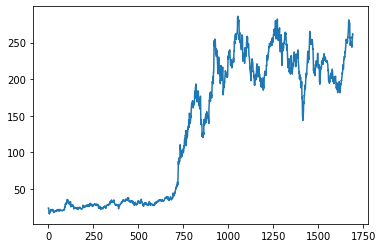

In [61]:
plt.plot(df.Close)

In [62]:
df

,index,Open,High,Low,Close,Volume
0,0,19.000000,25.000000,17.540001,23.889999,18766300
1,1,25.790001,30.420000,23.299999,23.830000,17187100
2,2,25.000000,25.920000,20.270000,21.959999,8218800
3,3,23.000000,23.100000,18.709999,19.200001,5139800
4,4,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
1687,1687,244.820007,246.850006,242.779999,246.169998,3010700
1688,1688,246.110001,258.119995,246.020004,258.000000,7575500
1689,1689,257.000000,261.000000,254.270004,255.729996,4816600
1690,1690,262.399994,265.750000,259.059998,262.049988,7100400


In [63]:
###Splitting Data into Training and test

In [64]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1184, 1)
(508, 1)


In [65]:
data_training.head()

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001
4,16.110001


In [66]:
data_testing.head()

,Close
1184,188.679993
1185,195.699997
1186,194.729996
1187,200.710007
1188,195.649994


In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [68]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.64579633],
       [0.65845174],
       [0.64857164]])

In [69]:
x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [70]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [71]:
x_train.shape

(1084, 100, 1)

In [72]:
## ML Model

In [73]:
from keras.layers import Dense, LSTM
from keras.models import Sequential 

In [74]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
34/34 [==============================] - 10s 103ms/step - loss: 0.0268
Epoch 2/20
34/34 [==============================] - 3s 86ms/step - loss: 0.0021
Epoch 3/20
34/34 [==============================] - 3s 88ms/step - loss: 0.0020
Epoch 4/20
34/34 [==============================] - 3s 86ms/step - loss: 0.0017
Epoch 5/20
34/34 [==============================] - 3s 82ms/step - loss: 0.0018
Epoch 6/20
34/34 [==============================] - 3s 84ms/step - loss: 0.0016
Epoch 7/20
34/34 [==============================] - 3s 88ms/step - loss: 0.0014
Epoch 8/20
34/34 [==============================] - 3s 88ms/step - loss: 0.0015
Epoch 9/20
34/34 [==============================] - 3s 88ms/step - loss: 0.0014
Epoch 10/20
34/34 [==============================] - 3s 89ms/step - loss: 0.0012
Epoch 11/20
34/34 [==============================] - 3s 88ms/step - loss: 0.0015
Epoch 12/20
34/34 [==============================] - 3s 89ms/step - loss: 0.0012
Epoch 13/20
34/34 [================

In [77]:
past_100_days=data_training.tail(100)

In [78]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\ISHAN CHAUHAN\AppData\Local\Temp\ipykernel_11452\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [79]:
final_df.head()

,Close
0,227.479996
1,230.470001
2,235.339996
3,231.100006
4,235.289993


In [80]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.60473332],
       [0.62630778],
       [0.66144736],
       [0.6308536 ],
       [0.66108657],
       [0.66072588],
       [0.56281112],
       [0.71505879],
       [0.68136229],
       [0.68540297],
       [0.70733812],
       [0.71375994],
       [0.68735108],
       [0.62991555],
       [0.7038747 ],
       [0.69651483],
       [0.70899767],
       [0.7750198 ],
       [0.76073309],
       [0.7794934 ],
       [0.82985775],
       [0.79594479],
       [0.82278667],
       [0.75091997],
       [0.75791904],
       [0.71513091],
       [0.7435601 ],
       [0.75344533],
       [0.75597081],
       [0.72768596],
       [0.63474993],
       [0.63323463],
       [0.61786563],
       [0.61050576],
       [0.57753086],
       [0.51006564],
       [0.52832091],
       [0.47745142],
       [0.47052458],
       [0.45695935],
       [0.43560134],
       [0.39064864],
       [0.44844508],
       [0.53820615],
       [0.54563813],
       [0.56952162],
       [0.55776027],
       [0.567

In [81]:
input_data.shape

(608, 1)

In [82]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [83]:
x_test , y_test=  np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(508, 100, 1)
(508,)


In [84]:
## Making Predictions

In [85]:
y_predicted =model.predict(x_test)

16/16 [==============================] - 2s 35ms/step


In [86]:
y_predicted.shape

(508, 1)

In [87]:
scaler.scale_

array([0.00721553])

In [88]:
scale_factor=1/0.00721553
y_predicted=y_predicted* scale_factor
y_test = y_test* scale_factor
    

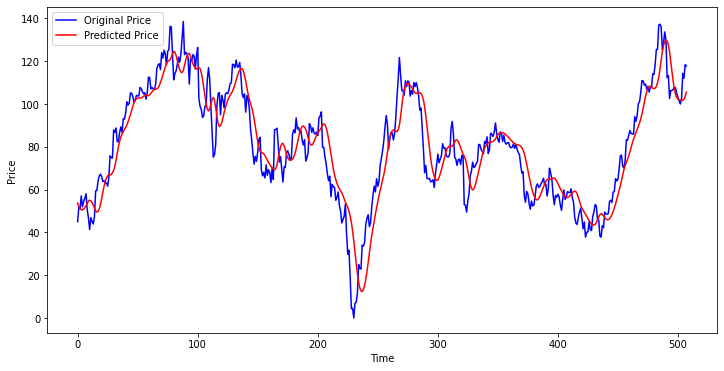

In [89]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="Original Price")
plt.plot(y_predicted,'r',label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()